In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

#Importamos modelos clasificatorios
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Importamos modelos predictivos regresion
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

### 1. Carga y estudio de la estructura del dataset

In [2]:
# Cargamos el dataset
data = pd.read_csv('loan_data.csv')

#Mostramos informacion relevante de las columnas 
#Mostramos la cantidad de registros y columnas
print(data.shape)

#Mostramos los tipos de datos de las columnas
print(data.info())

#Mostramos la cantidad de valores nulos por columna
#Describe de columnas numericas
# array_num_column = data.dtypes == dtypes.numbers
print(data.describe())

# Mostramos los primeros 5 registros
print("Mostrar los primeros 5 registros")
print(data.head())

#Guardamos las variables target de clasificación y regresión
target = 'loan_status'
target_regresion = 'risk_score'

(45000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               45000 non-null  float64
 1   gender            45000 non-null  object 
 2   education         45000 non-null  object 
 3   income            45000 non-null  float64
 4   yrs_exp           45000 non-null  int64  
 5   ownership         45000 non-null  object 
 6   amount            45000 non-null  float64
 7   purpose           44962 non-null  object 
 8   int_rate          45000 non-null  float64
 9   percent_income    45000 non-null  float64
 10  cred_hist_length  45000 non-null  float64
 11  risk_score        45000 non-null  int64  
 12  previous_loans    45000 non-null  object 
 13  loan_status       45000 non-null  int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 4.8+ MB
None
                age        income       yrs_exp        amoun

De el estudio de la estructura del dataset hemos sacado las siguientes conclusiones:
- Los datos estan distribuidos en 45000 registros y 14 columnas
- De las cuales 9 son de tipo numerico y 5 son de tipo object

Nota para el cliente: Gracias ha este analisis exploratorio de los datos hemos podido observar que contamos con datos erroneos como por ejemplo una persona con una edad de **144 años**, otra
con una experiencia laboral de **125 años** y otra con una puntuacion de riesgo de **77710** que desvirtua los datos, por lo que en futuros pasos se procedera a limpiar los datos antes de realizar el analisis de los mismos.

### Grafico de pares
Hacemos una representacion grafica para observar la relaciones entre las multiples columnas 

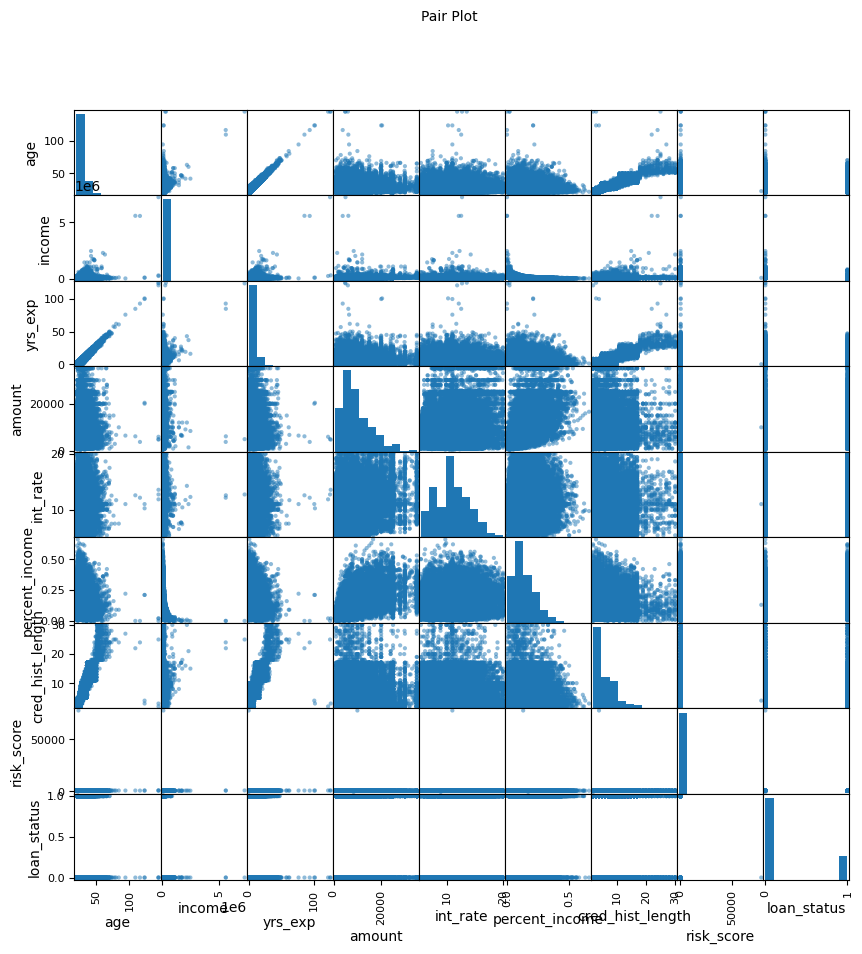

In [3]:
scatter_matrix(data, figsize=(10, 10))
plt.suptitle("Pair Plot", fontsize=10)
plt.show()

### 2. Limpieza de datos (data cleaning)
- 2.1 Deteccion de valores nulos
- 2.2 Deteccion de valores erroneos
- 2.4 Deteccion de valores erroneso mediante graficas y z-score
- 2.5 Aplicacion de tecnicas limpieza (borrado de datos, aplicacion de medias...)

In [4]:
#Deteccion de valores nulos
#Mostramos la cantidad de valores nulos por columna
null_values = data.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna")
print(null_values)

na_values = data.isna().sum().sort_values(ascending=False)
print("Cantidad de valores NA por columna")
print(na_values)

#Deteccion de valores erroneos, indicando los valores unicos de las columnas categoricas
#Mostramos los valores unicos de cada columnas categoricas
print("Valores unicos de cada columna categoricas")
for column in data.select_dtypes(include='object').columns:
    print(column, data[column].unique())


#Cantidad de filas con valor 'femal' en la columna
print("Cantidad de filas erroneas")
rows_wrong_gender = data[data['gender'] == 'femal'].shape[0]

#Cantidad de filas con valor 'OWN ' en la columna
rows_wrong_ownership = data[data['ownership'] == 'OWN '].shape[0]

#Cantidad de filas con valor nan en la columna
rows_wrong_purpose = data[data['purpose'].isnull()].shape[0]

#Calculamos porcentaje total de valores erroneos
total_rows = data.shape[0]
total_wrong_rows = (rows_wrong_gender + rows_wrong_ownership + rows_wrong_purpose * 100) / total_rows
print("El total de filas erroneas es: ", round(total_wrong_rows,4), "%")


Cantidad de valores nulos por columna
purpose             38
age                  0
education            0
income               0
yrs_exp              0
gender               0
ownership            0
amount               0
int_rate             0
percent_income       0
cred_hist_length     0
risk_score           0
previous_loans       0
loan_status          0
dtype: int64
Cantidad de valores NA por columna
purpose             38
age                  0
education            0
income               0
yrs_exp              0
gender               0
ownership            0
amount               0
int_rate             0
percent_income       0
cred_hist_length     0
risk_score           0
previous_loans       0
loan_status          0
dtype: int64
Valores unicos de cada columna categoricas
gender ['female' 'male' 'femal']
education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'OWN ']
purpose ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMP

### Aplicacion de tecnicas de limpieza de datos

In [5]:
#Limpieza de datos nulos y erroneos
#Eliminamos las filas con valores nulos
data_clean = data.dropna()

#Corroboramos que se hayan eliminado los valores nulos
null_values = data_clean.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna")
print(null_values)

#Tranformamos los valores erroneos de la columnas categoricas
data_clean = data_clean.replace({'femal': 'female'})
data_clean = data_clean.replace({'OWN ': 'OWN'})

#Corroboramos que se hayan modificado los valores erroneos de las columnas categoricas
print("Valores unicos de cada columna categoricas")
for column in data_clean.select_dtypes(include='object').columns:
    print(column, data_clean[column].unique())


Cantidad de valores nulos por columna
age                 0
gender              0
education           0
income              0
yrs_exp             0
ownership           0
amount              0
purpose             0
int_rate            0
percent_income      0
cred_hist_length    0
risk_score          0
previous_loans      0
loan_status         0
dtype: int64
Valores unicos de cada columna categoricas
gender ['female' 'male']
education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
purpose ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loans ['No' 'Yes']


### Deteccion de valores atipicos mediante graficas


Index(['age', 'income', 'yrs_exp', 'amount', 'int_rate', 'percent_income',
       'cred_hist_length', 'risk_score', 'loan_status'],
      dtype='object')


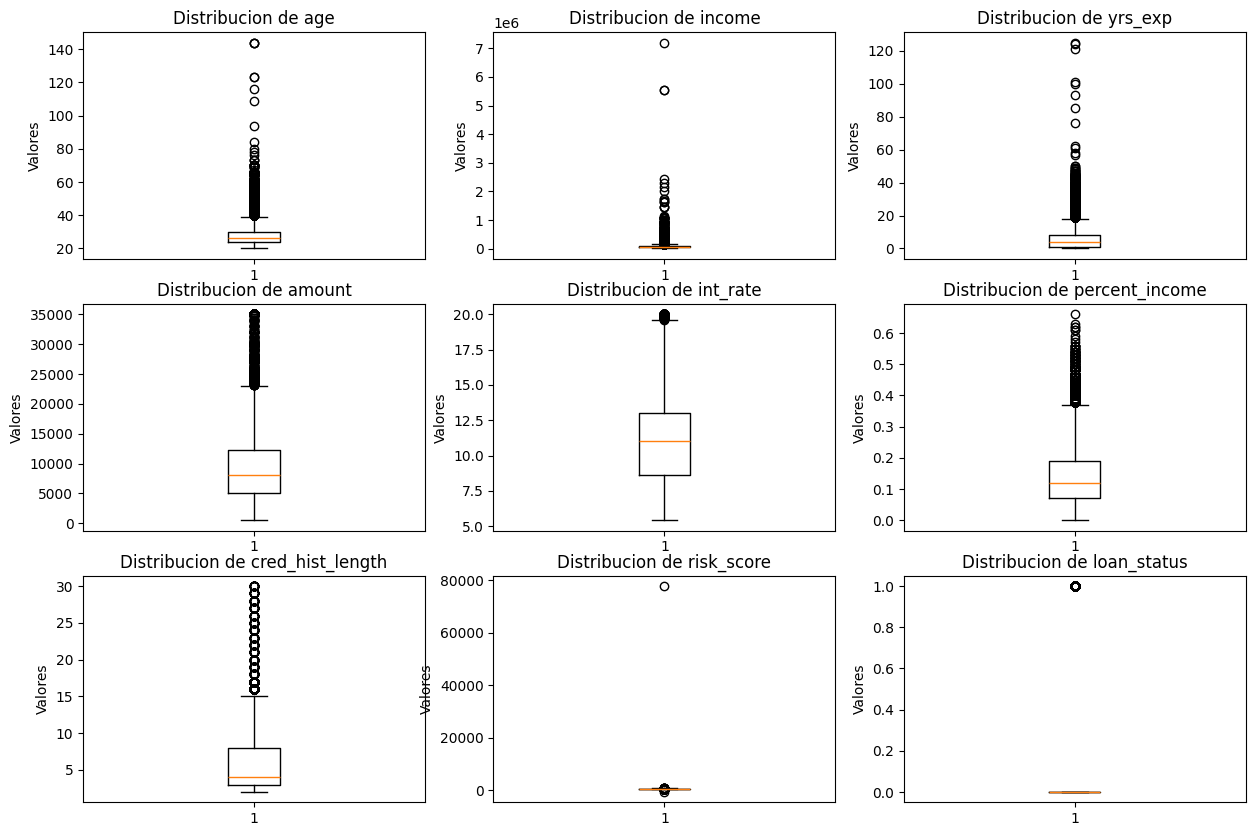

In [6]:
categories = data_clean.select_dtypes(include='number').columns
print(categories)

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

#Graficamos la distribucion de las variables numericas
for i, var in enumerate(categories):
    axes[i].boxplot(data_clean[var])
    axes[i].set_title(f"Distribucion de {var}")
    axes[i].set_ylabel("Valores")

for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.show()

📝 Nota para el cliente: Gracias a estas graficas hemos podido observar que tenemos un par de clientes con edades y años de experiencia laboral comprendidos en un rango que 
que no se ajustan a la realidad, en los siguientes pasos detallaremos el proceso de limpieza de dichos datos.
- Ya que son pocos datos respecto al total de filas hemos decidido lo siguiente:
1. La edad maxima de los clientes sera de 100 años
2. Los años de experiencia laboral maxima seran de 51 años (Edad minima para entrar a trabajar - Edad de jubilacion) Ej: 67 - 16 = 51 años
3. Eliminamos outliers de la columna de risk-score que desvirtuan la realidad de los datos

In [7]:
#Calculamos el porcentaje de valores atipicos en las columnas age y yrs_exp
total_rows = data_clean.shape[0]

#Obtenemos valores atipicos de la columna risk_score
media_risk_score = data_clean['risk_score'].mean()
std_risk_score = data_clean['risk_score'].std()
outliers = []

for element in data_clean['risk_score'].values:
    z = abs(element - media_risk_score) / std_risk_score
    if z > 2:
        outliers.append(element)

#Calculamos el porcentaje de valores atipicos en las columnas age, yrs_exp y risk_score
total_outliers = (data_clean[data_clean['age'] > 100].shape[0] + data_clean[data_clean['yrs_exp'] > 51].shape[0] + len(outliers)) * 100 / total_rows
print("El total de valores atipicos es: ", round(total_outliers,4), "%")
print("Cantidad de datos antes de la limpieza: ", data_clean.shape)

# Eliminar valores atípicos de las columnas age y yrs_exp
data_clean = data_clean[data_clean['age'] <= 120]
data_clean = data_clean[data_clean['yrs_exp'] <= 51]

#Eliminamos los valores atipicos de la columna risk_score con z-score
data_clean = data_clean[~data_clean['risk_score'].isin(outliers)]

#Corroboramos que se hayan eliminado los valores atipicos
print("Cantidad de datos despues de la limpieza: ", data_clean.shape)

El total de valores atipicos es:  0.0467 %
Cantidad de datos antes de la limpieza:  (44962, 14)
Cantidad de datos despues de la limpieza:  (44948, 14)


 📓 Nota cliente: Antes de continuar desarrollando nuestros modelos, es una buena practica verificar si el Dataframe esta desbalanceado


In [8]:
class_types = data_clean[target].value_counts()
class_proportion = data_clean[target].value_counts(normalize=True) * 100

print("Tipos de clases")
print(class_types)
print("Proporcion de clases")
print(round(class_proportion,2))

Tipos de clases
loan_status
0    34980
1     9968
Name: count, dtype: int64
Proporcion de clases
loan_status
0    77.82
1    22.18
Name: proportion, dtype: float64


📓 Nota cliente: Nos encontramos que el dataframe esta desbalanceado ya que tenemos un 77% de registros de la clase 0 (prestamos no concedidos)
frente a un 22% de la clase 1 (prestamos concedidos)

### Ingeniería de características
Una vez hemos realizado la limpieza de datos vamos a codificar y escalar nuestros datos siguiendo los siguientes pasos:
1. Conversion de columnas categoricas al tipo 'category' y de la columna 'age' a entero

In [9]:
# Convertir la columna age a tipo entero
data_clean['age'] = data_clean['age'].astype(int)
# Convertir todas las columnas categóricas object a tipo category
data_clean[data_clean.select_dtypes(['object']).columns] = data_clean.select_dtypes(['object']).astype('category')
print(data_clean.info())

# #Codificamos las columnas categoricas
gender_map = {'male': 0, 'female': 1}
data_clean['gender_encoded'] = data_clean['gender'].map(gender_map)
data_clean.drop(['gender'], axis=1)

education_map = {'High School': 0, 'Associte': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4}
data_clean['education_encoded'] = data_clean['education'].map(education_map)

# Rellenamos los valores NaN con 0
data_clean['education_encoded'] = data_clean['education_encoded'].fillna(0)
data_clean['education_encoded'] = data_clean['education_encoded'].astype(int)

data_clean.drop(['education'], axis=1)

data_ownership = pd.get_dummies(data_clean['ownership'], prefix='ownership', dtype=int, drop_first=True)
data_clean = pd.concat([data_clean, data_ownership], axis=1)

data_purpose = pd.get_dummies(data_clean['purpose'], prefix='purpose', dtype=int, drop_first=True)
data_clean = pd.concat([data_clean, data_purpose], axis=1)

data_previous_loans = {'No': 0, 'Yes': 1}
data_clean['previous_loans_encoded'] = data_clean['previous_loans'].map(data_previous_loans)
data_clean['previous_loans_encoded'] = data_clean['previous_loans_encoded'].astype(int)

data_encoded = data_clean.drop(['gender','education','ownership', 'purpose', 'previous_loans'], axis=1)

print("Verificamos que todas las columnas sean numericas")
print(data_encoded.info())
print(data_encoded.head())


<class 'pandas.core.frame.DataFrame'>
Index: 44948 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               44948 non-null  int64   
 1   gender            44948 non-null  category
 2   education         44948 non-null  category
 3   income            44948 non-null  float64 
 4   yrs_exp           44948 non-null  int64   
 5   ownership         44948 non-null  category
 6   amount            44948 non-null  float64 
 7   purpose           44948 non-null  category
 8   int_rate          44948 non-null  float64 
 9   percent_income    44948 non-null  float64 
 10  cred_hist_length  44948 non-null  float64 
 11  risk_score        44948 non-null  int64   
 12  previous_loans    44948 non-null  category
 13  loan_status       44948 non-null  int64   
dtypes: category(5), float64(5), int64(4)
memory usage: 3.6 MB
None
Verificamos que todas las columnas sean numericas
<class 'pa

#### Nota para el cliente: Para codificar las columnas categoricas hemos seguido los siguientes tecnicas:

|Columna  | Método de codificación | Explicación | 
|--|--|--|
| gender	 | Codificación binaria | Solo dos valores, se puede mapear a 0 y 1. |
| education	| Codificación ordinal | Tiene un orden implícito (ej. High School < Doctorate). |
| ownership		 | One-Hot Encoding |No hay un orden natural, se codifica con columnas binarias.|
| purpose| One-Hot Encoding| No hay un orden natural, se codifica con columnas binarias. |
| previous_loans| Codificación binaria|Solo dos valores, se puede mapear a 0 y 1.|



### Seleccion de carateristicas
En esta seccion vamos a elegir las columnas que son mas relevantes con el valor target, creando un mapa de correlacion
Este mapa nos mostrará de forma gráfica las dependencias entre las diferentes
variables
- Una correlación alta (cercana a 1) entre dos variables indicará que cuando una aumenta la otra también lo hace
- También tenemos que tener en cuenta la correlación inversa(cercana a -1) cuando una aumenta la otra desciende

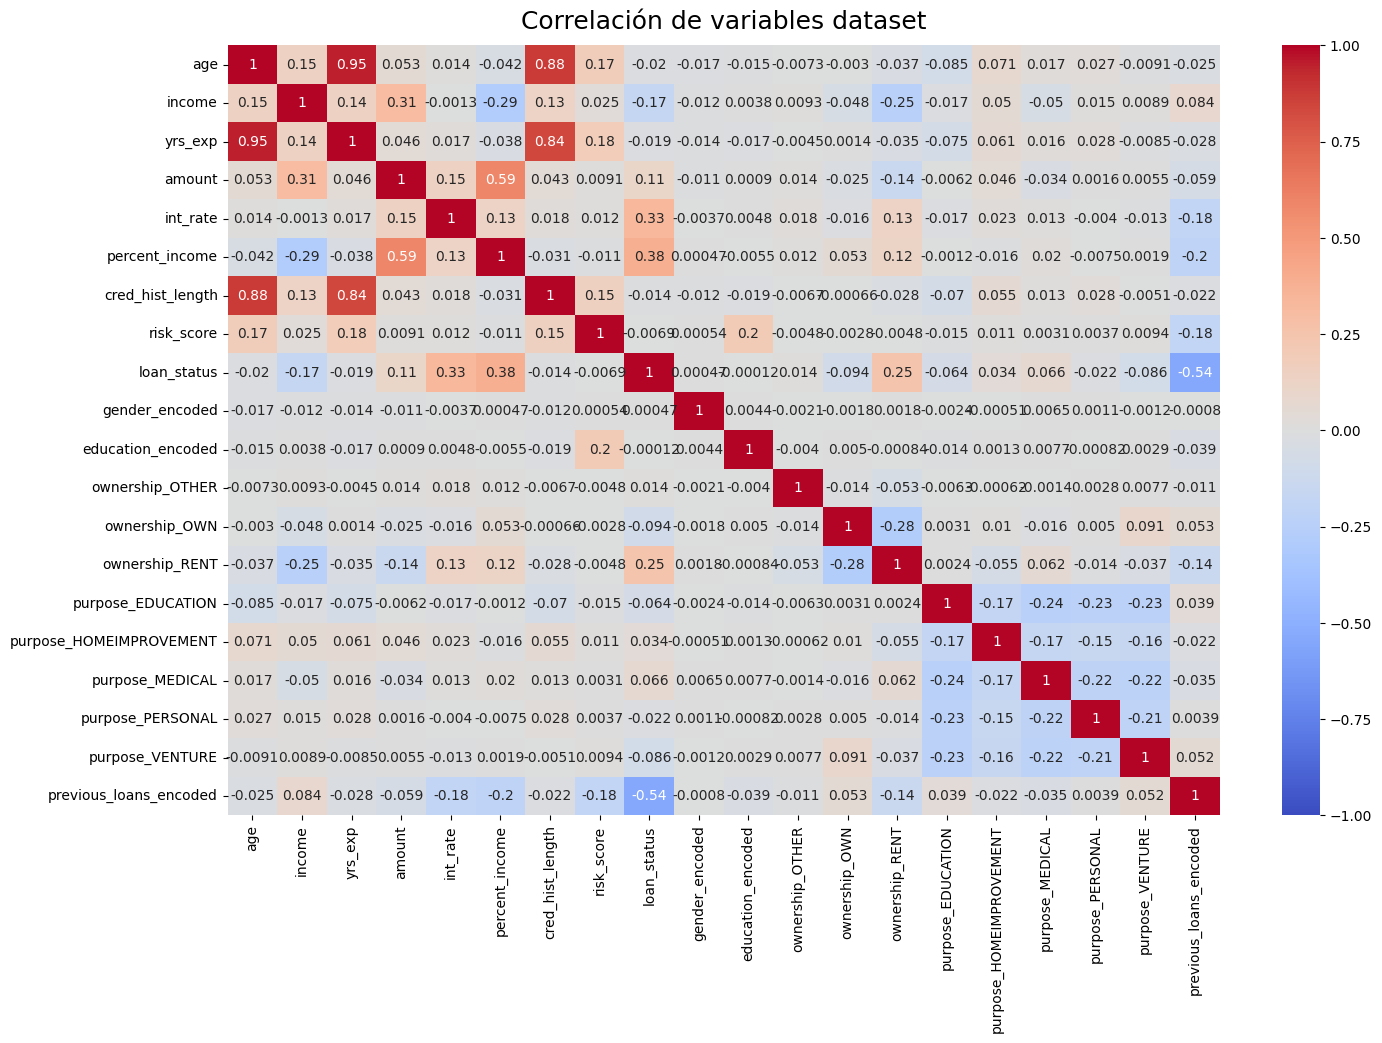

In [10]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(data_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlación de variables dataset', fontdict={'fontsize': 18}, pad=12)
plt.show()


Una vez observado el grafico, hacemos una seleccion de las columnas mas relevantes con cada uno de nuestros target o valores predictores, en este caso seleccionaremos las siguientes columnas para los modelos:
- Modelos de clasificacion:
1. income
2. amount
3. int_rate
4. percent_income
5. ownership_RENT
6. previous_loans_encoded

- Modelos de regresion:
1. age
2. yrs_exp
3. cred_hist_length
4. education_encoded
5. previous_loans_encoded

In [11]:

relevant_columns_regresion = ['age', 'yrs_exp', 'cred_hist_length','education_encoded','previous_loans_encoded']
data_regresion = data_encoded[relevant_columns_regresion + [target_regresion]]

relevant_columns = ['income', 'amount', 'int_rate','percent_income','ownership_RENT','previous_loans_encoded']
data_encoded = data_encoded[relevant_columns + [target]]

print("Columnas relevantes classificacion")
print(data_encoded.head())
print(data_encoded.info())

print("Columnas relevantes regresion")
print(data_regresion.head())
print(data_regresion.info())

#Escalamos las variables numericas
scaler = StandardScaler()
data_encoded[['income', 'amount', 'int_rate', 'percent_income']] = scaler.fit_transform(data_encoded[['income', 'amount', 'int_rate', 'percent_income']])

print("Columnas escaladas")
print(data_encoded.head())

Columnas relevantes classificacion
    income   amount  int_rate  percent_income  ownership_RENT  \
0  71948.0  35000.0     16.02            0.49               1   
1  12282.0   1000.0     11.14            0.08               0   
2  12438.0   5500.0     12.87            0.44               0   
3  79753.0  35000.0     15.23            0.44               1   
4  66135.0  35000.0     14.27            0.53               1   

   previous_loans_encoded  loan_status  
0                       0            1  
1                       1            0  
2                       0            1  
3                       0            1  
4                       0            1  
<class 'pandas.core.frame.DataFrame'>
Index: 44948 entries, 0 to 44999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   income                  44948 non-null  float64
 1   amount                  44948 non-null  float64
 2   int_rate

Nota: "Una vez tenemos las columnas mas relevantes respecto a nuestro valor target u objetivo, es una buena practica ver el comportamiento individual de cada una de estas respecto del target"

Text(0.5, 1.0, 'Distribución de valores de loan_status')

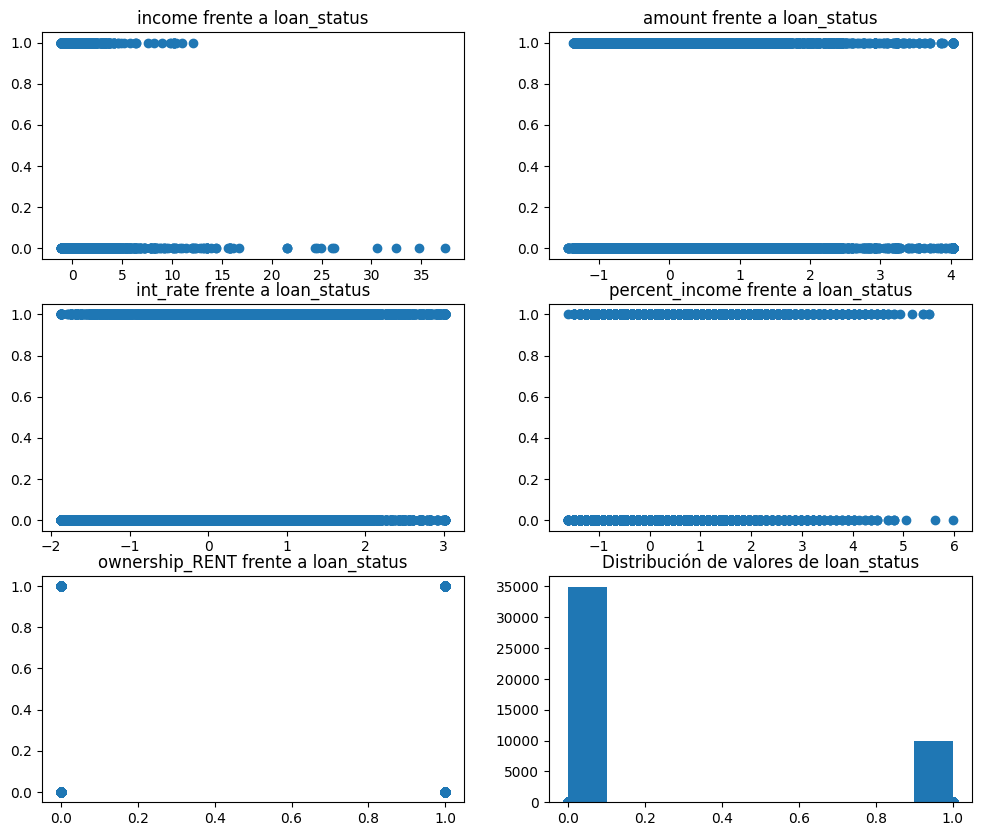

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
for i in range(0, len(relevant_columns)):
 fila = i // 2
 columna = i % 2
 ax[fila, columna].scatter(x = data_encoded[relevant_columns[i]],
 y = data_encoded[target])
 ax[fila, columna].set_title(relevant_columns[i] + " frente a " + target)
ax[2, 1].hist(data_encoded[target], bins=10)
ax[2, 1].set_title("Distribución de valores de " + target)

### 🏋️‍♂️ Entrenamiento Modelos de clasificacion
Debido a que hay un cierto desbalanceo entre las clase 77% frente a un 22% nos decantamos por desarrollar modelos a los que les afecta menos estos desbalanceos como son:
1. Árboles de Decisión
2. Random Forest
3. XGBoost

In [13]:
# Creamos una funcion que entrene un modelo de clasificacion y muestre las metricas y la matriz de confusion
def train_model(model, type_model):
    model.fit(X_train, y_train.astype(int))
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_pred, y_test.astype(int))

    print("Metricas del modelo: ", type_model)
    print(classification_report(y_pred, y_test.astype(int)))
    print("Score Test: ", model.score(X_test, y_test.astype(int)))
    print("Score Train: ", model.score(X_train, y_train.astype(int)))

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Concedida', 'Concedidas'], yticklabels=['No Concedida', 'Concedidas'])
    plt.xlabel('Prediccion')
    plt.ylabel('Real')
    plt.title('Matriz de confusion del modelo ' + type_model)
    plt.show()

Metricas del modelo:  Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7053
           1       0.73      0.76      0.74      1937

    accuracy                           0.89      8990
   macro avg       0.83      0.84      0.83      8990
weighted avg       0.89      0.89      0.89      8990

Score Test:  0.8864293659621802
Score Train:  0.8883141442794371


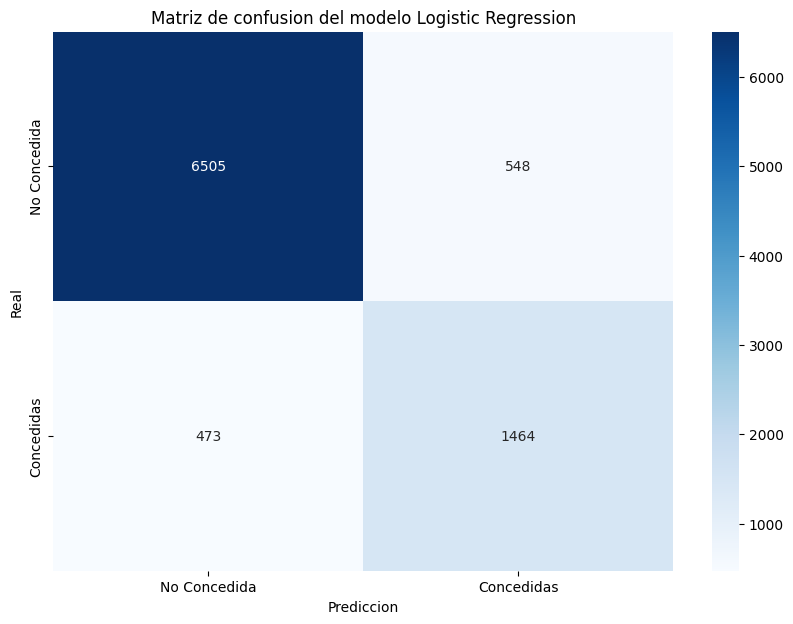

Metricas del modelo:  Random Forest
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      7179
           1       0.77      0.85      0.81      1811

    accuracy                           0.92      8990
   macro avg       0.86      0.89      0.88      8990
weighted avg       0.92      0.92      0.92      8990

Score Test:  0.918020022246941
Score Train:  1.0


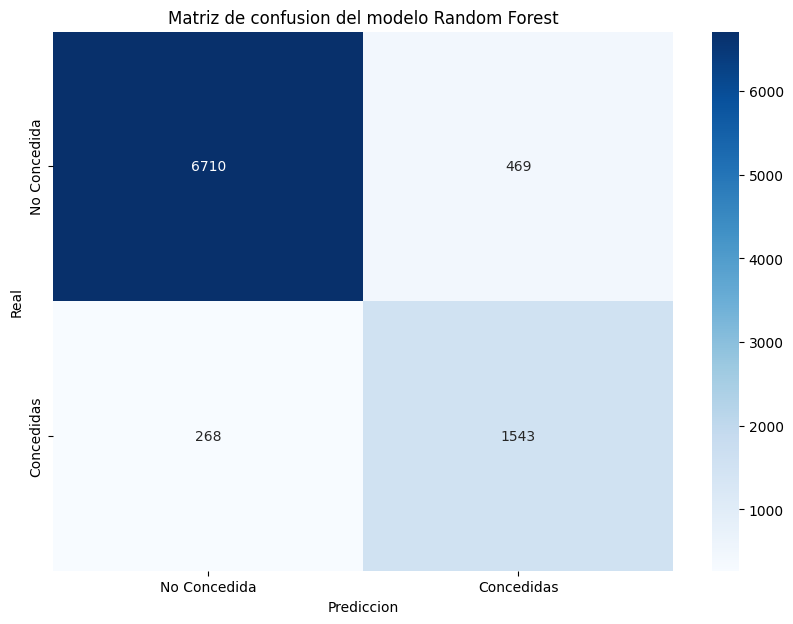

Metricas del modelo:  Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6994
           1       0.76      0.77      0.77      1996

    accuracy                           0.90      8990
   macro avg       0.85      0.85      0.85      8990
weighted avg       0.90      0.90      0.90      8990

Score Test:  0.8961067853170189
Score Train:  1.0


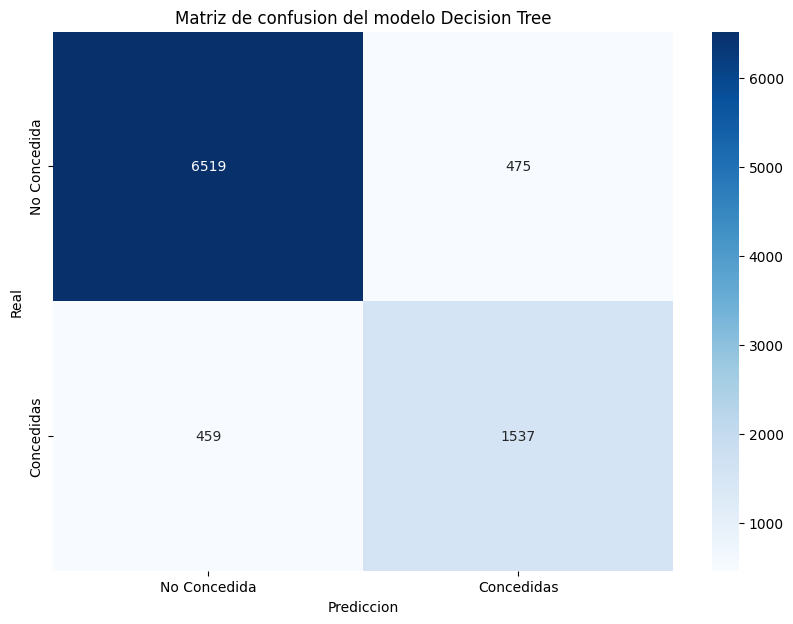

Metricas del modelo:  SVM
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7291
           1       0.71      0.84      0.77      1699

    accuracy                           0.91      8990
   macro avg       0.84      0.88      0.86      8990
weighted avg       0.92      0.91      0.91      8990

Score Test:  0.9064516129032258
Score Train:  0.9093386728961567


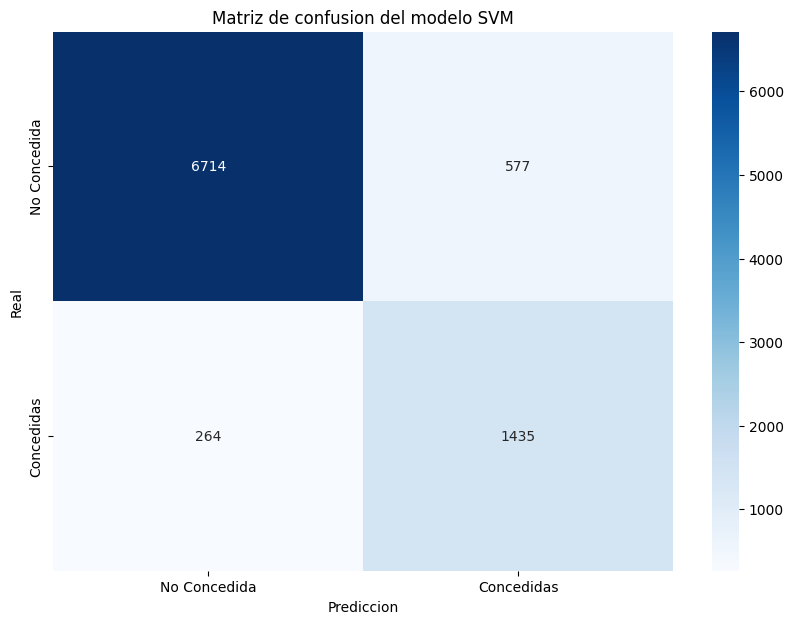

Metricas del modelo:  XGBoost
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7185
           1       0.77      0.86      0.81      1805

    accuracy                           0.92      8990
   macro avg       0.87      0.90      0.88      8990
weighted avg       0.93      0.92      0.92      8990

Score Test:  0.9211345939933259
Score Train:  0.9393459035541465


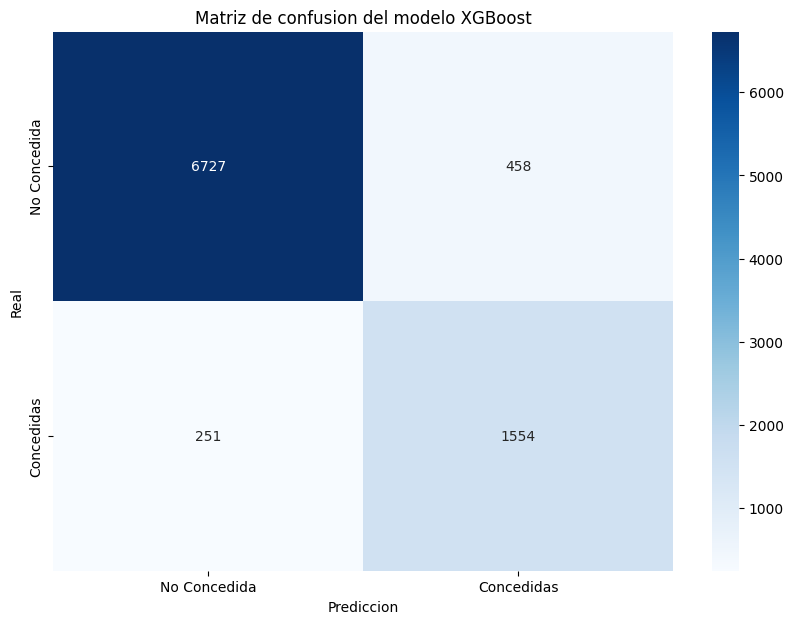

In [14]:
#Separamos las columnas predictoras y la variable target
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

#Dividimos el dataset en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creamos el modelo y entrenamos
lr = LogisticRegression(random_state=42)
train_model(lr, 'Logistic Regression')

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
train_model(rf, 'Random Forest')

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
train_model(dt, 'Decision Tree')

svm= SVC(kernel = 'rbf',C=1.0, gamma='scale',probability=True)
train_model(svm, 'SVM')

xgb = XGBClassifier(max_depth=5)
train_model(xgb, 'XGBoost')



### 📊 Curva ROC
La curva ROC (Receiver Operating Characteristic) es otra metrica que nos ayuda a determinar como de bien se comporta el modelo distinguiendo entre las clases positivas y negativas y a su vez nos permite seleccionar el mejor modelo para el problema que estamos tratando (Cuanto mas se aproxime a 1 en la grafica mejor desepeño tendra el modelo clasificando los registros).

<Figure size 1000x800 with 0 Axes>

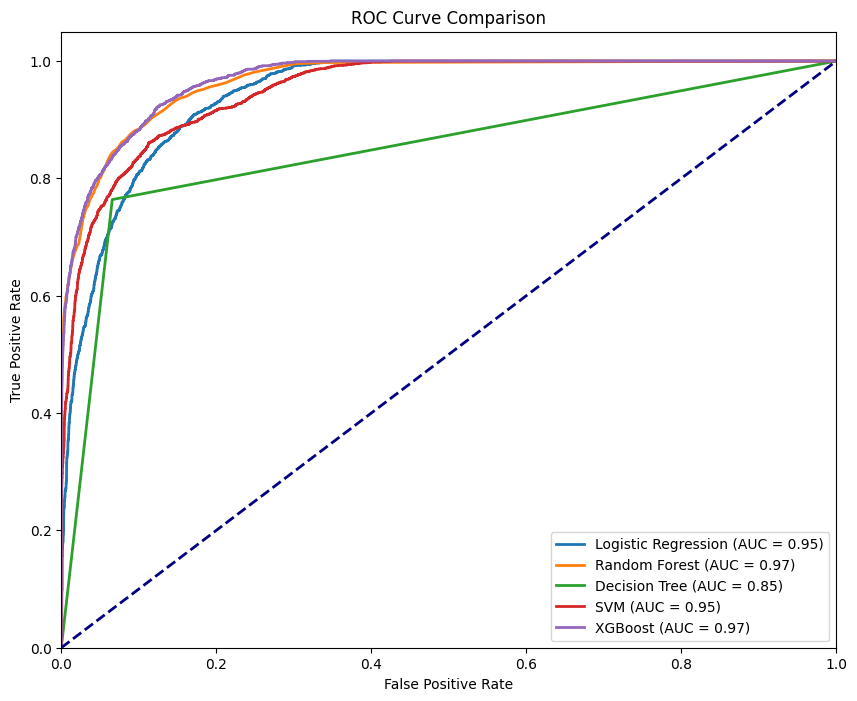

Logistic Regression: AUC - ROC = 0.95
Random Forest: AUC - ROC = 0.97
Decision Tree: AUC - ROC = 0.85
SVM: AUC - ROC = 0.95
XGBoost: AUC - ROC = 0.97


In [15]:
from sklearn.metrics import roc_auc_score, roc_curve
models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'Decision Tree': dt,
    'SVM': svm,
    'XGBoost': xgb
}
plt.figure(figsize=(10, 8))

roc_auc_scores = {}

# Initialize a dictionary to store AUC - ROC scores
roc_auc_scores = {}

# Plot the ROC curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the probabilities
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate the AUC - ROC score
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_auc_scores[name] = roc_auc
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Print the AUC - ROC scores for each model
for name, score in roc_auc_scores.items():
    print(f'{name}: AUC - ROC = {score:.2f}')


### 🤔 Seleccion del modelo de clasificacion
Una vez entrenados y sacado metricas de los diferentes modelos de clasificacio, hemos analizado los datos obtenidos y hemos llegado a la conclusion
de que el mejor modelo para este caso en concreto es el **XGBoost** ya que segun sus metricas: 
- Obtiene la precision mas alta 92% en el conjunto de prueba.
- Mejor F1-score para la clase 1 (0.81), lo que indica que maneja mejor la clase minoritaria.

### 📈 Mejora del modelo seleccionado (Tunning de Hiperparametros)
Una vez seleccionado el mejor modelo para resolver nuestro problema, vamos a optimizar su rendimiento mediante una serie de tecnicas denominadas **(Tuning de hiperparametros)** las cuales buscan la optimizacion del modelo seleccionado

#### Ajuste de hiperparametros
Primero ajustamos algunos de hiperparametros clave para el modelo Random Forest

In [16]:
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Suggest hyperparameters
    params = {
        'objective': 'binary:logistic',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }

    # Create an XGBoost classifier with the suggested hyperparameters
    xgb = XGBClassifier(**params, random_state=42)

    xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    scores = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')
    return scores.mean()

# Create an Optuna study with TPE sampler
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())

# Oprimizacion del estudio para 100 epocas
study.optimize(objective, n_trials=100)

print(f"Best trial: {study.best_trial}")
print(f"Best hyperparameters: {study.best_params}")
print(f"Best score: {study.best_value:.4f}")



c:\Users\ESP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-01-14 23:25:11,794] A new study created in memory with name: no-name-977d862c-4535-431c-8572-d6989d05af05
[I 2025-01-14 23:25:15,549] Trial 0 finished with value: 0.9155693146647781 and parameters: {'max_depth': 7, 'learning_rate': 0.061272617507810004, 'n_estimators': 82, 'subsample': 0.730711159819841, 'colsample_bytree': 0.903267158858369, 'gamma': 2.572871659475153, 'min_child_weight': 2}. Best is trial 0 with value: 0.9155693146647781.
[I 2025-01-14 23:25:17,556] Trial 1 finished with value: 0.8872919701263848 and parameters: {'max_depth': 3, 'learning_rate': 0.016123583849836445, 'n_estimators': 58, 'subsample': 0.5672881989406723, 'colsample_bytree': 0.8878283104770384, 'gamma': 3.520020581003938, 'm

Best trial: FrozenTrial(number=83, state=1, values=[0.9234452465756255], datetime_start=datetime.datetime(2025, 1, 14, 23, 32, 52, 694404), datetime_complete=datetime.datetime(2025, 1, 14, 23, 32, 56, 818040), params={'max_depth': 9, 'learning_rate': 0.12128858140412388, 'n_estimators': 138, 'subsample': 0.5383959775967064, 'colsample_bytree': 0.6397993101712424, 'gamma': 0.12836342998853062, 'min_child_weight': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=True, low=0.01, step=None), 'n_estimators': IntDistribution(high=300, log=False, low=50, step=1), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'gamma': FloatDistribution(high=5.0, log=False, low=0.0, step=None), 'min_child_weight': IntDistribution(high=10, log=False, low=1, step=1)}, tr

#### Evaluamos el modelo optimizado con los mejores hiperparametros

c:\Users\ESP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:34:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Metricas del modelo:  XGBoost
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7175
           1       0.77      0.86      0.81      1815

    accuracy                           0.92      8990
   macro avg       0.87      0.90      0.88      8990
weighted avg       0.92      0.92      0.92      8990

Score Test:  0.9195773081201335
Score Train:  0.9556983147004839


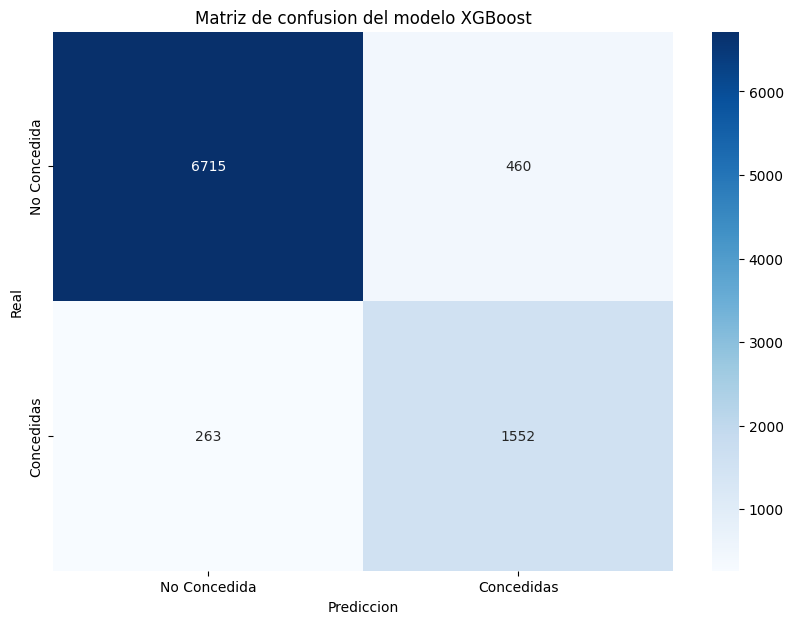

In [17]:
best_params = study.best_params
best_params['objective'] = 'binary:logistic'

xgb_final_model = XGBClassifier(**best_params, use_label_encoder=False, random_state=42)
train_model(xgb_final_model, 'XGBoost')


In [18]:
# Clasificamos un nuevo registro con el modelo entrenado
relevant_columns = ['income', 'amount', 'int_rate','percent_income','ownership_RENT','previous_loans_encoded']
new_record = {
    'income': 130713.0,
    'amount': 35000.0,
    'int_rate': 18.39,
    'percent_income': 0.27,
    'ownership_RENT': 1,
    'previous_loans_encoded': 1
}
dt_new_record = pd.DataFrame([new_record])
# Escalamos las variables numericas
columns_to_scale = ['income', 'amount', 'int_rate', 'percent_income']
# Escalamos el nuevo registro
dt_new_record[columns_to_scale] = scaler.transform(dt_new_record[columns_to_scale])

prediction = xgb_final_model.predict(dt_new_record)
print("Prediccion del modelo: ", prediction)


     income   amount  int_rate  percent_income  ownership_RENT  \
0  130713.0  35000.0     18.39            0.27               1   

   previous_loans_encoded  
0                       1  
Prediccion del modelo:  [0]


### 📝 Conclusiones modelo de clasificacion seleccionado
"Con el modelo seleccionado y los hiperparametros optimizados hemos llegado a la conclusion de que al cliente nuevo que introducimos al dataset no se le concedería el prestamo"

### 🏋️‍♂️ Entrenamiento de modelos de regresion


In [19]:

#Separamos las columnas predictoras y la variable target
X = data_regresion.drop(columns=[target_regresion])
y = data_regresion[target_regresion]

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Dividimos el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
#Predicciones
y_pred = model.predict(X_test)
#Metricas
print("Metricas del modelo de regresion")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("---------------------")


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
#Predicciones
y_pred = model.predict(X_test)
#Metricas
print("Metricas del modelo de regresion Random Forest")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("---------------------")

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
#Predicciones
y_pred = model.predict(X_test)
#Metricas
print("Metricas del modelo de regresion Decision Tree")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("---------------------")

model = XGBRegressor()
model.fit(X_train, y_train)
#Predicciones
y_pred = model.predict(X_test)
#Metricas
print("Metricas del modelo de regresion XGBRegressor")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))


Metricas del modelo de regresion
Mean Squared Error:  2250.6441857553
R2 Score:  0.10745862319852195
---------------------
Metricas del modelo de regresion Random Forest
Mean Squared Error:  2520.3932399426426
R2 Score:  0.0004838318303033162
---------------------
Metricas del modelo de regresion Decision Tree
Mean Squared Error:  2740.18693313187
R2 Score:  -0.08668008629279145
---------------------
Metricas del modelo de regresion XGBRegressor
Mean Squared Error:  2306.3242039442853
R2 Score:  0.08537757396697998


#### 🤔 Seleccion del mejor modelo para la regresion
Visto las metricas de los diferentes modelos de regresion, hemos seleccionado el modelo de regresion **XGBRegressor** ya que tiene las menores puntuaciones en el error cuadratico medio y mayor coeficiente de determinacion (R2):
- Menor error cuadratico significa que tiene mejor precision a la hora de realizar predicciones
- Menor coeficiente de determinacion significa que es el que mejor ajusta los datos y explica la varianza de la variable target u objetivo

In [20]:
relevant_columns_regresion = ['age', 'yrs_exp', 'cred_hist_length','education_encoded','previous_loans_encoded']
new_record = {
    'age': 22,
    'yrs_exp': 0,
    'cred_hist_length': 4,
    'education_encoded': 3,
    'previous_loans_encoded': 0
}

dt_new_record = pd.DataFrame([new_record])

prediction = model.predict(dt_new_record)
print("Prediccion del modelo para la variable risk_score es de:", prediction)



Prediccion del modelo para la variable risk_score es de: [649.63794]


### 📈 Mejora del modelo seleccionado (Tunning de Hiperparametros)

Una vez seleccionado el mejor modelo para resolver nuestro problema, vamos a optimizar su rendimiento mediante una serie de tecnicas denominadas **(Tuning de hiperparametros)** las cuales buscan la optimizacion del modelo seleccionado


In [21]:
def objective(trial):
      params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
    }
      
      model = XGBRegressor(**params, random_state=42)
      model.fit(X_train, y_train)

      y_pred = model.predict(X_test)
      score = mean_squared_error(y_test, y_pred)
      return score

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

best_params = study.best_params
xgb_tuned_model = XGBRegressor(**best_params, random_state=42)
xgb_tuned_model.fit(X_train, y_train)

#Predicciones
y_pred = model.predict(X_test)

#Metricas
print("Metricas del modelo de regresion XGBRegressor")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))


[I 2025-01-14 23:34:15,211] A new study created in memory with name: no-name-65738292-e72b-4687-8869-6e578c92c08a


[I 2025-01-14 23:34:15,722] Trial 0 finished with value: 2274.4905841382715 and parameters: {'n_estimators': 59, 'max_depth': 13, 'learning_rate': 0.049232433295154844, 'subsample': 0.8669561475324603, 'colsample_bytree': 0.503305086763022, 'gamma': 0.5968203458729965, 'reg_alpha': 1.324798688286697, 'reg_lambda': 0.20042049986783383}. Best is trial 0 with value: 2274.4905841382715.
[I 2025-01-14 23:34:18,540] Trial 1 finished with value: 2320.5759577479066 and parameters: {'n_estimators': 444, 'max_depth': 9, 'learning_rate': 0.05568513055206376, 'subsample': 0.6942680361836367, 'colsample_bytree': 0.664664041653357, 'gamma': 4.247025129025503, 'reg_alpha': 6.378318450568511, 'reg_lambda': 6.886202959526285}. Best is trial 0 with value: 2274.4905841382715.
[I 2025-01-14 23:34:20,814] Trial 2 finished with value: 2478.864940381648 and parameters: {'n_estimators': 261, 'max_depth': 14, 'learning_rate': 0.19787597276754137, 'subsample': 0.8754302383365236, 'colsample_bytree': 0.608502124

Best trial: FrozenTrial(number=43, state=1, values=[2253.025882415052], datetime_start=datetime.datetime(2025, 1, 14, 23, 35, 12, 228679), datetime_complete=datetime.datetime(2025, 1, 14, 23, 35, 12, 539371), params={'n_estimators': 69, 'max_depth': 3, 'learning_rate': 0.15841586961432197, 'subsample': 0.5204325553319374, 'colsample_bytree': 0.5354902507193814, 'gamma': 2.199576900883657, 'reg_alpha': 3.0911041591663144, 'reg_lambda': 8.175833571743787}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=50, step=1), 'max_depth': IntDistribution(high=15, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'gamma': FloatDistribution(high=5.0, log=False, low=0.0, step=None), 'reg_alpha': FloatDistribution(high

### ✨Prediccion de un nuevo registro con el modelo optimizado
A continuacion predecimos un nuevo registro con el modelo optimizado con los mejores hiperparametros encontrados con optuna

In [22]:
relevant_columns_regresion = ['age', 'yrs_exp', 'cred_hist_length','education_encoded','previous_loans_encoded']
new_record = {
    'age': 22,
    'yrs_exp': 0,
    'cred_hist_length': 4,
    'education_encoded': 3,
    'previous_loans_encoded': 0
}

dt_new_record = pd.DataFrame([new_record])

prediction = xgb_tuned_model.predict(dt_new_record)
print("Prediccion del modelo para la variable risk_score es de:", prediction)

Prediccion del modelo para la variable risk_score es de: [647.6876]


### 📝 Conclusiones modelo de regresion seleccionado
Con el tunning de hiperparametros podemos observar que la puntuacion en risk_score es mas baja que sin realizar la optimizacion que es mas alta
lo que junto con las nuevas metricas, nos confirma que ahora el modelo es mejor a la hora de predecir el risk_score en nuevos registros.

Y con el nuevo registro que hemos añadido al modelo para realizar su predicción, hemos obtenido un **risk score** aproximado de **647** (un valor bastante cercano al de registros ya existentes en el dataset que son de similares caracteristicas)

#### ✔ Correccion de la practica
- Balancear el dataset antes de entrenar los modelos para que las metricas sean mejor
- Explicar las metricas de cada modelo
- Hacer un describe de las categorias numericas
- Guardar el peso de la normalizacion para utilizarlo posteriormente con los nuevos registros que utilizamos para probar los modelos